## 1. Use of Metrics 

In [10]:
import os
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Datasets")

In [1]:
import sklearn
sklearn.__version__

'1.2.1'

In [3]:
# pip install -U scikit-learn

In [24]:
# pip install -U matplotlib

In [3]:
# pip install -U pandas

In [2]:
# pip install -U numpy

In [5]:
# pip install -U seaborn

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report

In [12]:
eval_data = pd.read_csv("eval_data.csv")
eval_data

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
5,1,1
6,1,0
7,0,0
8,1,1
9,0,1


In [33]:
confusion_matrix(eval_data['y_test'], eval_data['y_pred'])

#          | y_pred(0) | y_pred(1) |
# y_test(0)|___________|___________|
# y_test(1)|           |           |

array([[5, 2],
       [3, 2]], dtype=int64)

In [34]:
accuracy_score(eval_data['y_test'], eval_data['y_pred'])
# (5+2)/(5+2+3+2)

0.5833333333333334

In [35]:
# Recall(0)
recall_score(eval_data['y_test'], eval_data['y_pred'], pos_label=0)
# 5/(5+2) # correctly predicted zeros / zeros in y_test

0.7142857142857143

In [36]:
# Recall(1)
recall_score(eval_data['y_test'], eval_data['y_pred'], pos_label=1)
# 2/(2+3) # correctly predicted ones / ones in y_test

0.4

In [37]:
# Recall Average
recall_score(eval_data['y_test'], eval_data['y_pred'], average='macro')
# mean of Recall(0) and Recall(1)

0.5571428571428572

In [38]:
# Recall Weighted Average
recall_score(eval_data['y_test'], eval_data['y_pred'], average='weighted')
# 

0.5833333333333334

In [39]:
# Precision (0)
precision_score(eval_data['y_test'], eval_data['y_pred'], pos_label=0)

0.625

In [40]:
# Precision (1)
precision_score(eval_data['y_test'], eval_data['y_pred'], pos_label=1)

0.5

In [41]:
# Precision Average
precision_score(eval_data['y_test'], eval_data['y_pred'], average='macro')

0.5625

In [42]:
# Precision Weighted Average
precision_score(eval_data['y_test'], eval_data['y_pred'], average='weighted')

0.5729166666666666

In [43]:
# F1 (0)
f1_score(eval_data['y_test'], eval_data['y_pred'], pos_label=0)

0.6666666666666666

In [44]:
# F1 (1)
f1_score(eval_data['y_test'], eval_data['y_pred'], pos_label=1)

0.4444444444444445

In [45]:
# F1 Average
f1_score(eval_data['y_test'],  eval_data['y_pred'], average='macro')

0.5555555555555556

In [46]:
# F1 Weighted Average
f1_score(eval_data['y_test'], eval_data['y_pred'], average='weighted')

0.5740740740740741

In [48]:
print(classification_report(eval_data['y_test'], eval_data['y_pred']))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



## 2. ROC-AUC Score and ROC curve

In [13]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score 
import matplotlib.pyplot as plt

In [14]:
comp_prob = pd.read_csv("comp_prob.csv")
comp_prob

,y_test,yprob_1,yprob_2
0,1,0.6,0.70
1,1,0.4,0.45
2,0,0.8,0.90
3,0,0.2,0.20
4,0,0.3,0.15
5,1,0.6,0.70
6,0,0.3,0.30
7,0,0.8,0.60
8,1,0.6,0.70
9,0,0.3,0.20


In [15]:
fpr, tpr, thres = roc_curve(comp_prob['y_test'], comp_prob['yprob_1'])

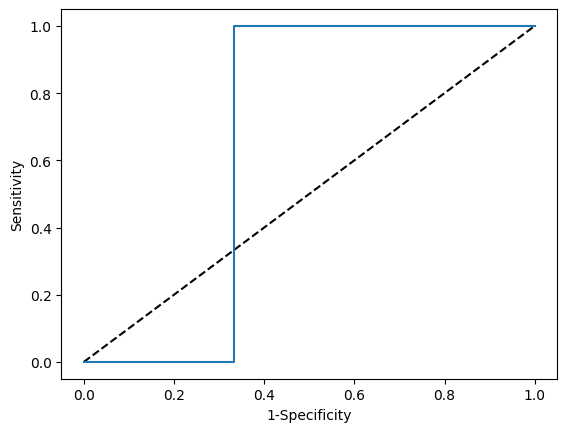

In [23]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

In [16]:
roc_auc_score(comp_prob['y_test'], comp_prob['yprob_1'])

0.6666666666666666

In [17]:
fpr, tpr, thres = roc_curve(comp_prob['y_test'], comp_prob['yprob_2'])

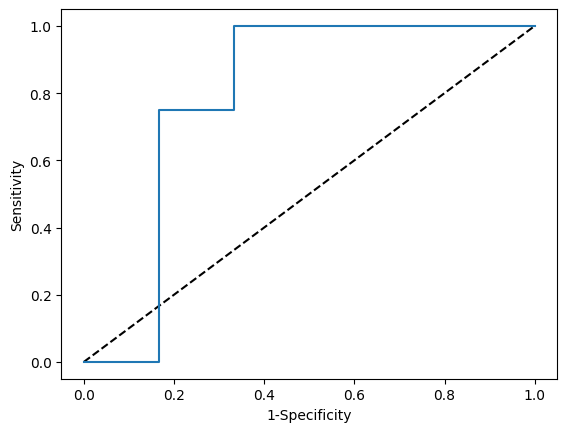

In [27]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()

In [18]:
roc_auc_score(comp_prob['y_test'], comp_prob['yprob_2'])

0.7916666666666666

Log Loss
$$
-\frac{1}{N}\sum_{i=1}^{N}[y_{i}\ln(p_{i}) + (1-y_{i})\ln(1-p_{i})]
$$
Lower the log loss, better the model

In [22]:
## Log Loss
from sklearn.metrics import log_loss

In [21]:
log_loss(comp_prob['y_test'], comp_prob['yprob_1'])

0.6960811811170735

In [20]:
log_loss(comp_prob['y_test'], comp_prob['yprob_2'])

0.6052889328967097

### Measures for Numeric Prediction Models

In [25]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
y_test = np.array([14, 18, 92, 43])
y_pred = np.array([13.4, 20.9, 100.1, 40.3])

In [5]:
pred_error = y_test - y_pred
pred_error

array([ 0.6, -2.9, -8.1,  2.7])

Mean Absoloute Error

In [23]:
mean_absolute_error1 = np.mean(np.abs(y_test-y_pred))
mean_absolute_error1

3.574999999999999

In [26]:
mean_absolute_error(y_test, y_pred)

3.574999999999999

Mean Squared Error

In [31]:
mean_squared_error1 = np.mean(np.square(pred_error))
mean_squared_error1

20.417499999999983

In [28]:
mean_squared_error(y_test, y_pred)

20.417499999999983

Root Mean Squared Error

In [32]:
root_mean_square_error1 = np.sqrt(np.mean(np.square(y_test-y_pred)))
root_mean_square_error1

4.518572783523575

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.518572783523575

$R^{2}$ Value

In [36]:
r_squared = 1 - np.sum(np.square(y_test-y_pred))/np.sum(np.square(y_test-np.mean(y_test)))
r_squared

0.9788460791297028

In [37]:
r2_score(y_test, y_pred)

0.9788460791297028